# TP 07. Réseaux de neurones


## I. Réalisation des algorithmes

Ici, nous définissons un API (une sorte d'interfaces) pour les fonctions d'activation et les fonctions du cout. 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import colors
%matplotlib inline

# API
class Activation(object): 
    # Calculer l'activation en se basant sur Z (la somme linéaire)
    def activer(self, Z):
        pass
    # Calculer la dérivée en se basant sur Z et l'activation A
    def deriver(self, Z, H):
        pass

# API
class Cout(object): 
    # Calculer l'activation en se basant sur Z (la somme linéaire)
    def calculer(self, H, Y):
        pass
    # Calculer la dérivée en se basant sur Z et l'activation A
    def deriver(self, H, Y):
        pass


### I.1. Les fonctions d'activation

L'activation logistique est calculée comme :
$$A = \sigma(Z) = \frac{1}{1+e^{-Z}}$$

La dérivée partielle est donnée par :
$$\frac{\partial \sigma(Z)}{\partial \theta} = \sigma(Z) (1-\sigma(Z))$$

In [2]:
# TODO réaliser la dérivée de la fonction d'activation logistique
def d_sigmaf(Z, A): 
    return None

def sigmaf(Z):
    return 1 / (1 + np.exp(-Z))
    
class Logistique(Activation):
    def activer(self, Z):
        return sigmaf(Z)
    def deriver(self, Z, H):
        return d_sigmaf(Z, H)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([0.84104179, 0.84290453]), array([0.1336905 , 0.13241648]))
#---------------------------------------------------------------------

logistique = Logistique()
z4_1 = np.array([1.666, 1.68])
a4_1 = logistique.activer(z4_1)
a4_1p = logistique.deriver(z4_1, a4_1)

a4_1, a4_1p

(array([0.84104179, 0.84290453]), array([0.1336905 , 0.13241648]))

### I.2. Les fonctions du coût

La fonction BCE est calaculée par :
$$BCE = - ( Y \log(H) + (1-Y) \log(1-H))$$

Sa dérivée est calculée par :
$$\frac{\partial BCE}{\partial \theta} = \frac{H-Y}{H - H^2}$$

In [3]:
# TODO réaliser la dérivée de la fonction d'erreur BCE
def d_bcef(H, Y):
    return None

def bcef(H, Y):
    return - (Y * np.log(H) + (1-Y) * np.log(1-H))

class BCE(Cout):
    def calculer(self, H, Y):
        return bcef(H, Y)
    def deriver(self, H, Y):
        return d_bcef(H, Y)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([1.83258146, 0.17078832]), array([ 6.25      , -1.18623962]))
#---------------------------------------------------------------------

bce = BCE()

H = np.array([0.840 , 0.843])
Y = np.array([0., 1.])
J = bce.calculer(H, Y)
DJ = bce.deriver(H, Y)

J, DJ

(array([1.83258146, 0.17078832]), array([ 6.25      , -1.18623962]))

### I.3. Neurone

$$\delta^{(l)} = \frac{\partial f^{(l)}}{\partial z^{(l)}} w^{(l+1)} \delta^{(l+1)}$$

$$\frac{\partial J}{\partial w^{(l)}} = a^{(l-1)} \delta^{(l)}$$

$$\frac{\partial J}{\partial b^{(l)}} = \delta^{(l)}$$

Le produit est un produit matriciel (sur $M$) et il faut prendre la moyenne des sorties (sur $Ln$). 

La fonction qui met à jour les paramètres prend en entrée : 
- $W[Lp]$ une liste des poids; un vecteur de taille $Lp$ (le nombre des neurones de la couche précédente)
- $b$ le biais 
- $Z[M]$ la combinaison linéaire du neurone courant; un vecteur de taille $M$ (le nombre des échantillons)
- $A[M]$ l'activation du neurone courant; un vecteur de taille $M$  
- $A\_past[M, Lp]$ les activations des neurones de la couche précédente; une matrice de taille est $(M * Lp)$
- $Delta\_next[M, Ln]$ le delta calculé dans la couche suivante; une matrice de taille $M * Ln$ ($Ln$ : le nombre des neurones dans la couche suivante)
- $W\_next[Ln]$ les poids vers la couche suivante; un vecteur de taille $Ln$
- $act$ c'est un object de type "Activation"; il fournit deux méthodes : "act.activer" et "act.deriver"
- $alpha$ le pas de l'entraînement 

In [4]:
# TODO Réaliser la fonction de mise à jours des poids d'un neurone
def neurone_maj(W, b, Z, A, A_past, Delta_next, W_next, act, alpha=1.):
    Delta = None
    bn = None
    Wn = None
    return Wn, bn, Delta

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([0.49375218, 0.2046736 ]),
#  -0.30324311474187016,
#  array([ 0.00696306, -0.00047683]))
#---------------------------------------------------------------------

W_t = np.array([0.5, 0.2])
b_t = -0.3
Z_t = np.array([0.5, 2.2])
# M (l'activation actuelle)
A_t = np.array([0.62245933, 0.90024951])
# M * L (les activations de la couche précédente)
A_past_t = np.array([[2., -1.], [3., 5.]])
# L
Delta_next_t = np.array([[ 0.14523862, -0.02613822], [ 0.1394202, -0.02531591]]).T
W_next_t = np.array([0.3, -0.1])
act = Logistique() #la fonction d'activation

W_nouv, b_nouv, Delta_nouv = neurone_maj(W_t, b_t, Z_t, A_t, A_past_t, Delta_next_t, W_next_t, act, alpha=1.)

W_nouv, b_nouv, Delta_nouv

(array([0.49375218, 0.2046736 ]),
 -0.30324311474187016,
 array([ 0.00696306, -0.00047683]))

In [5]:
class Neurone(object):
    def __init__(self, taille_entree, activation=Logistique()):
        self.b = 0.
        self.w = np.array([0.] * taille_entree)
        self.act = activation
        
    def randomiser(self):
        self.w = np.random.rand(len(self.w))
        self.b = np.random.rand(1)[0]
        
    def __aggreger(self, X):
        return np.dot(X, self.w) + self.b
    
    def activer(self, X):
        self.a_past = X
        self.z = self.__aggreger(X)
        self.a = self.act.activer(self.z)
        return self.a
    
    def actualiser(self, delta_next, w_next, alpha=1.):
        w_ancien = self.w.copy()
        self.w, self.b, delta = neurone_maj(self.w, self.b, self.z, self.a, self.a_past, 
                                            delta_next, w_next, self.act, alpha=alpha)
        return delta, w_ancien

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# z2_1 = [0.5 2.2]
# a2_1 = [0.62245933 0.90024951]
# derivee(a2_1) = [0.23500371 0.08980033]
# ancien b = -0.3
# ancien w = [0.5 0.2]
# delta2 = [ 0.00696306 -0.00047683]
# nouveaux b = -0.30324311473938026
# nouveaux w = [0.49375218 0.2046736 ]
#---------------------------------------------------------------------

# Céation d'un neurone avec deux entrées
n = Neurone(2)
# ---------------------
#On ne doit pas affecter les poids directement 
#Ici, c'est juste pour avoir les mêmes poids du neurone de sortie dans l'exemple du cours
# On va reproduire les paramètres du neurone 1 couche cachée 1 (couche 2)
n.b = -0.3
n.w = np.array([0.5, 0.2])
# ---------------------

# M X Lp (ici c'est X : couche d'entrée)
A1 = np.array([[2., -1.], [3., 5.]])
# M X Ln (Delta de la couche suivante)
Delta3 = np.array([[ 0.14523862, -0.02613822], [ 0.1394202, -0.02531591]]).T
W3_1 = np.array([0.3, -0.1])


A2_1 = n.activer(A1)
print("z2_1 = " + str(n.z))
print("a2_1 = " + str(A2_1))
# la dérivée de la fonction logistique n'a pas besoin de z, donc on passe 0
print("derivee(a2_1) = " + str(n.act.deriver(0,A2_1)))
print("ancien b = " + str(n.b))

Delta2, W2_ancien = n.actualiser(Delta3, W3_1) 

print("ancien w = " + str(W2_ancien))
print("delta2 = " + str(Delta2))
print("nouveaux b = " + str(n.b))
print("nouveaux w = " + str(n.w))

z2_1 = [0.5 2.2]
a2_1 = [0.62245933 0.90024951]
derivee(a2_1) = [0.23500371 0.08980033]
ancien b = -0.3
ancien w = [0.5 0.2]
delta2 = [ 0.00696306 -0.00047683]
nouveaux b = -0.30324311473938026
nouveaux w = [0.49375218 0.2046736 ]


### I.4. La couche

**Rien à programmer ici.**

Une classe qui définit une couche en indiquant le nombre des neurones (taille), le nombre de ces entrées et la fonction d'activation de ces neurones.
Cette classe comprend 3 méthodes : 
- une pour initialiser les paramètres des neurones d'une façon aléatoire
- une pour appliquer la propagatation avant 
- une pour appliquer la rétropropagation 

In [6]:
class Couche(object):
    
    def __init__(self, taille, taille_entree, activation=logistique):
        self.neurones = [Neurone(taille_entree, activation=activation) for i in range(taille)]
        
    def randomiser(self):
        for neurone in self.neurones:
            neurone.randomiser()

    def propagation_avant(self, X):
        activations = []
        for neurone in self.neurones:
            activations.append(neurone.activer(X))
        return np.array(activations).T
    
    def retro_propagation(self, delta_next, W_next, alpha=1.):
        W_anciens = []
        Deltas = []
        for i, neurone in enumerate(self.neurones):
            delta, w_ancien = neurone.actualiser(delta_next, W_next[i], alpha=alpha)
            W_anciens.append(w_ancien)
            Deltas.append(delta)
        return np.array(Deltas).T, np.array(W_anciens).T



#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# activations : [[0.62245933 0.66818777]
#  [0.90024951 0.96770454]]
# deltas : [[ 0.00696306  0.00682726]
#  [-0.00047683 -0.00017109]]
#---------------------------------------------------------------------

# la couche 2 
c2 = Couche(2, 2)

#On ne doit pas affecter les poids directement 
#Ici, c'est juste pour avoir les mêmes poids du neurone de sortie dans l'exemple du cours
c2.neurones[0].b = -0.3
c2.neurones[0].w = np.array([0.5, 0.2])
c2.neurones[1].b = 0.5
c2.neurones[1].w = np.array([0.3, 0.4])

a2 = np.array([[2., -1.], [3., 5.]])
# L
delta3 = np.array([[ 0.14523862, -0.02613822], [ 0.1394202, -0.02531591]]).T
w3 = np.array([[0.3, -0.1],[0.5, -0.3]])

# M X Lp (ici c'est X : couche d'entrée)
a1 = np.array([[2., -1.], [3., 5.]])
a2 = c2.propagation_avant(a1)
print("activations : " + str(a2))

Deltas2, W_anciens2 = c2.retro_propagation(delta3, w3)

print("deltas : " + str(Deltas2))

activations : [[0.62245933 0.66818777]
 [0.90024951 0.96770454]]
deltas : [[ 0.00696306  0.00682726]
 [-0.00047683 -0.00017109]]


### I.5. Le réseau



In [7]:
class RN(object):
    def __init__(self, taille_entree, cout=bce, alpha=1.):
        self.taille_courante = taille_entree #la taille de la dernière couche
        self.cout = cout #objet de type Cout pour calculer le cout et sa dérivée
        self.alpha = alpha
        self.couches = []

    def ajouter_couche(self, taille, activation=logistique):
        nouv_couche = Couche(taille, self.taille_courante, activation=activation)
        self.couches.append(nouv_couche)
        self.taille_courante = taille
        
    def randomiser(self):
        for couche in self.couches:
            couche.randomiser()
    
    def predire(self, X): 
        Y = X
        if self.norm:
            Y = np.where(self.std==0, X, (X - self.mean)/self.std)
            
        for couche in self.couches:
            Y = couche.propagation_avant(Y)
        if Y.ndim == 2 and Y.shape[1] == 1:
            Y = Y.flatten()
        return np.where(Y < 0.5, 0, 1)
    
    
    def _faire_iteration(self, X, Y):
        # propagation avant
        a = X
        for couche in self.couches:
            a = couche.propagation_avant(a)
            
        # calcul du cout et sa dérivée 
        YY = np.array(Y)
        if YY.ndim < 2 : 
            YY = YY[:, np.newaxis]
        J = np.mean(self.cout.calculer(a, YY))
        J_prime = self.cout.deriver(a, YY)
        
        # retropropagation 
        w_past = np.array([[1.] * self.taille_courante])
        delta_past = J_prime
        for couche in reversed(self.couches): # on commance de la dernière couche vers la première
            delta_past, w_past = couche.retro_propagation(delta_past, w_past)
        return J
    
    def entrainer(self, X, Y, nbr_it=100, norm=False):
        couts = []
        X_norm = X
        self.norm = norm
        if norm:
            self.mean = np.mean(X, axis=0)
            self.std = np.std(X, axis=0)
            X_norm = np.where(self.std==0, X, (X - self.mean)/self.std)

        for i in range(nbr_it): 
            J = self._faire_iteration(X_norm, Y)
            couts.append(J)
        return couts
    
#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# le cout = 1.0020916974430965
# w4_1 = [0.51494626 0.56592079]
# w3_1 = [0.2665629 0.4641237]
# w3_2 = [-0.13199638 -0.33433028]
# w2_1 = [0.49375219 0.2046736 ]
# w2_2 = [0.29342937 0.40384135]
# la prédiction : [0 1]
#---------------------------------------------------------------------

X = np.array([[2., -1.], [3., 5.]])
Y = np.array([0., 1.])

rn = RN(2) #deux caractéristiques d'entrée
rn.ajouter_couche(2) #ajouter une couche avec 2 neurones (cachée)
rn.ajouter_couche(2) #ajouter une couche avec 2 neurones (cachée)
rn.ajouter_couche(1) #ajouter une couche avec 1 neurone (sortie)

#On ne doit pas affecter les poids directement 
#Ici, c'est juste pour avoir les mêmes poids du neurone de sortie dans l'exemple du cours
rn.couches[0].neurones[0].b = -0.3
rn.couches[0].neurones[0].w = np.array([0.5, 0.2])
rn.couches[0].neurones[1].b = 0.5
rn.couches[0].neurones[1].w = np.array([0.3, 0.4])

rn.couches[1].neurones[0].b = -0.3
rn.couches[1].neurones[0].w = np.array([0.3, 0.5])
rn.couches[1].neurones[1].b = -0.2
rn.couches[1].neurones[1].w = np.array([-0.1, -0.3])

rn.couches[2].neurones[0].b = 1.
rn.couches[2].neurones[0].w = np.array([0.7, 0.7])

J = rn._faire_iteration(X, Y)

print("le cout = " + str(J))
print("w4_1 = " + str(rn.couches[2].neurones[0].w))
print("w3_1 = " + str(rn.couches[1].neurones[0].w))
print("w3_2 = " + str(rn.couches[1].neurones[1].w))
print("w2_1 = " + str(rn.couches[0].neurones[0].w))
print("w2_2 = " + str(rn.couches[0].neurones[1].w))

rn.entrainer(X, Y, nbr_it=200)
print("la prédiction : " + str(rn.predire(X)))


le cout = 1.0020916974430965
w4_1 = [0.51494626 0.56592079]
w3_1 = [0.2665629 0.4641237]
w3_2 = [-0.13199638 -0.33433028]
w2_1 = [0.49375219 0.2046736 ]
w2_2 = [0.29342937 0.40384135]
la prédiction : [0 1]


## II. Application et analyse

In [8]:
# diabetes2
diabetes = pd.read_csv("datasets/diabetes2.csv") 
X_diabetes = diabetes.iloc[:, :-1].values  
Y_diabetes = diabetes.iloc[:, -1].values

# Cette configuration est mise en place comme ceci exprès
# C'est pour tester le cas où la régression est difavorisée
NBR_TEST = 240
# Supposant que les 30% premières lignes sont pour le test et le reste pour l'entraînement
X_test = X_diabetes[-NBR_TEST:, :] # 30% ou plus
Y_test = Y_diabetes[-NBR_TEST:].reshape([-1, 1])

X_train = X_diabetes[:-NBR_TEST, :] 
Y_train = Y_diabetes[:-NBR_TEST].reshape([-1, 1])

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_tests = scaler.transform(X_test)

X_trains[:5, :]

array([[ 0.63564802,  0.83833016,  0.16863427,  0.93506705, -0.67560188,
         0.22006711,  0.42947843,  1.43582544],
       [-0.85203884, -1.09137813, -0.14214721,  0.55085273, -0.67560188,
        -0.63225191, -0.38057337, -0.18535642],
       [ 1.23072277,  1.91039032, -0.24574104, -1.30618316, -0.67560188,
        -1.03405944,  0.56155209, -0.10003106],
       [-0.85203884, -0.96885697, -0.14214721,  0.16663841,  0.12145706,
        -0.44961212, -0.92060791, -1.03861003],
       [-1.14957621,  0.50139697, -1.48886696,  0.93506705,  0.74892899,
         1.37678577,  5.30446409, -0.0147057 ]])

#### II.1. Paramètres initiaux et complexité

Ici, on veut tester l'intêt de l'initialisation des paramètres (thétas) et la complexité du modèle.
Pour ce faire, on a entrainé 5 modèles et récupéré l'erreur d'entrainement et de validation. 
Les modèles testé sont :
- **Log0** : Un seule neurone (régression logistique) avec initialisation 0
- **LogR** : Un seule neurone (régression logistique) avec initialisation aléatoire
- **RN0** : Un réseau de neurone 4(relu)X2(relu)X1(sigmoid) avec initialisation 0
- **RN1** : Un réseau de neurone 4(relu)X2(relu)X1(sigmoid) avec initialisation 1
- **RNR** : Un réseau de neurone 4(relu)X2(relu)X1(sigmoid) avec initialisation aléatoire


2022-05-21 22:31:44.692458: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-21 22:31:44.692546: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-21 22:31:46.795464: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-21 22:31:46.795555: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-21 22:31:46.795598: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kariminf-pc): /proc/driver/nvidia/version does not exist
2022-05-21 22:31:46.796108: I tensorflow/core/platform/cpu_featur

entrainement : regression theta=0 ...
entrainement : regression theta=random ...
entrainement : RN theta=0 ...
entrainement : RN theta=1 ...
entrainement : RN theta=random ...


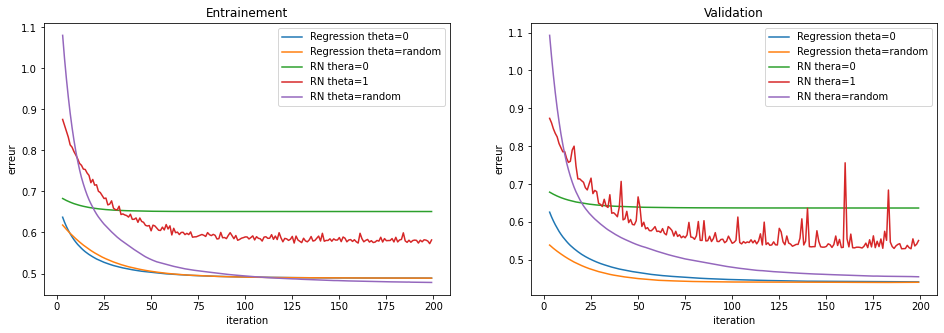

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential, Model

alpha=0.01
NBR_IT = 200

M, N = X_train.shape

reg0 = Sequential()
reg0.add(Dense(1, activation="sigmoid", kernel_initializer='zero', bias_initializer='zeros'))

reg0.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))

print("entrainement : regression theta=0 ...")
results = reg0.fit(X_trains, Y_train, epochs=NBR_IT, validation_data=(X_tests, Y_test), verbose=0)

regr = Sequential()
regr.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))

regr.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))

print("entrainement : regression theta=random ...")
resultsr = regr.fit(X_trains, Y_train, validation_data=(X_tests, Y_test), epochs=NBR_IT, verbose=0)


reg_m0 = Sequential()
reg_m0.add(Dense(4, activation="relu", kernel_initializer='zero', bias_initializer='zeros'))
reg_m0.add(Dense(2, activation="relu", kernel_initializer='zero', bias_initializer='zeros'))
reg_m0.add(Dense(1, activation="sigmoid", kernel_initializer='zero', bias_initializer='zeros'))

reg_m0.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))

print("entrainement : RN theta=0 ...")
results_m0 = reg_m0.fit(X_trains, Y_train, validation_data=(X_tests, Y_test), epochs=NBR_IT, verbose=0)

reg_m1 = Sequential()
reg_m1.add(Dense(4, activation="relu", kernel_initializer='one', bias_initializer='one'))
reg_m1.add(Dense(2, activation="relu", kernel_initializer='one', bias_initializer='one'))
reg_m1.add(Dense(1, activation="sigmoid", kernel_initializer='one', bias_initializer='one'))

reg_m1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))

print("entrainement : RN theta=1 ...")
results_m1 = reg_m1.fit(X_trains, Y_train, validation_data=(X_tests, Y_test), epochs=NBR_IT, verbose=0)


reg_mr = Sequential()
reg_mr.add(Dense(4, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
reg_mr.add(Dense(2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
reg_mr.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))

reg_mr.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))

print("entrainement : RN theta=random ...")
results_mr = reg_mr.fit(X_trains, Y_train, validation_data=(X_tests, Y_test), epochs=NBR_IT, verbose=0)

# on n'affiche pas les 3 premières itérations, le temps que le modèle se stabilise
# sinon, un modèle peut avoir une grande valeur par rapport aux autres 
# donc, on ne peut pas visualiser la convergence des autres
IT_range = range(NBR_IT)[3:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

ax1.title.set_text("Entrainement")
ax1.plot(IT_range, results.history["loss"][3:], label="Regression theta=0")
ax1.plot(IT_range, resultsr.history["loss"][3:], label="Regression theta=random")
ax1.plot(IT_range, results_m0.history["loss"][3:], label="RN thera=0")
ax1.plot(IT_range, results_m1.history["loss"][3:], label="RN theta=1")
ax1.plot(IT_range, results_mr.history["loss"][3:], label="RN theta=random")
ax1.set(xlabel='iteration', ylabel='erreur')
ax1.legend()

ax2.title.set_text("Validation")
ax2.plot(IT_range, results.history["val_loss"][3:], label="Regression theta=0")
ax2.plot(IT_range, resultsr.history["val_loss"][3:], label="Regression theta=random")
ax2.plot(IT_range, results_m0.history["val_loss"][3:], label="RN thera=0")
ax2.plot(IT_range, results_m1.history["val_loss"][3:], label="RN thera=1")
ax2.plot(IT_range, results_mr.history["val_loss"][3:], label="RN thera=random")
ax2.set(xlabel='iteration', ylabel='erreur')
ax2.legend()
plt.show()

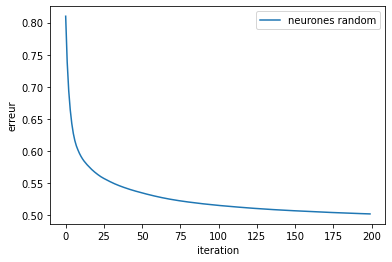

In [11]:
# Une autre façon pour le faire (gérer la boucle nous même)
# C'est juste pour ceux/celles intéressé(e)s par l'amélioration du temps d'entrainement
# Entrainer les modèles dans une seule boucle 
alpha=0.1
NBR_IT = 200

M, N = X_train.shape

inputs = Input(shape=(None,N), name="digits")

x1 = Dense(4, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')(inputs)
x2 = Dense(2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')(x1)
outputs = Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform', name="predictions")(x2)
model = Model(inputs=inputs, outputs=outputs)


loss=tf.keras.losses.BinaryCrossentropy()
optimizer=tf.keras.optimizers.SGD(learning_rate=alpha)

# print("entrainement ...")
# results = reg0.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)

hist = []
for epoch in range(NBR_IT):
    with tf.GradientTape() as tape:
        H_train = model(X_trains, training=True)  # Logits for this minibatch
        # Compute the loss value for this minibatch.
        J_train = loss(Y_train, H_train)
    dJ_train = tape.gradient(J_train, model.trainable_weights)
    optimizer.apply_gradients(zip(dJ_train, model.trainable_weights))
    hist.append(J_train.numpy().mean())
        
plt.plot(range(NBR_IT), hist, label="neurones random")
plt.xlabel("iteration")
plt.ylabel("erreur")
plt.legend()
plt.show()

**Analyser les résultats**
- On remarque que les modèles avec régression plus vite que les modèles de réseau de neurones (en terme des itérations et en terme de temps). Pourquoi ?
- On remarque que **RN0** ne s'améliore pas (il stagne dès les premières itérations). Expliquer pourquoi.
- On remarque que **RN1** s'améliore par rapport à **RN0**, mais il stagne rapidement par rapport **RNR**. Expliquer pourquoi.
- En remarquant la validation, quelle est le rapport entre le nombre des couches, la complexité du problème, le nombre/qualité des données et les problèmes d'apprentissage (sous/sur). Mentionner toutes les combinaisons qui peuvent causer des problèmes.

**Réponse**
- ...
- ...
- ...
- ...

#### II.2. Fonctions d'activation

Ici, on veut tester l'utilisation des fonctions d'activation dans les couches cachées et la couche de sortie.
Pour ce faire, on a entrainé 5 modèles et récupéré l'erreur d'entrainement dans chaque itération. 
Les modèles testé sont :
- **relu->sigmoid** : un réseau avec **relu** dans les couches cachées et **sigmoid** dans la couche de sortie
- **sigmoid->sigmoid** : un réseau avec **sigmoid** dans les couches cachées et **sigmoid** dans la couche de sortie
- **tanh->sigmoid** : un réseau avec **tanh** dans les couches cachées et **sigmoid** dans la couche de sortie
- **sigmoid->relu** : un réseau avec **sigmoid** dans les couches cachées et **relu** dans la couche de sortie
- **relu->relu** : un réseau avec **relu** dans les couches cachées et **relu** dans la couche de sortie


entrainement ...
entrainement ...
entrainement ...
entrainement ...
entrainement ...


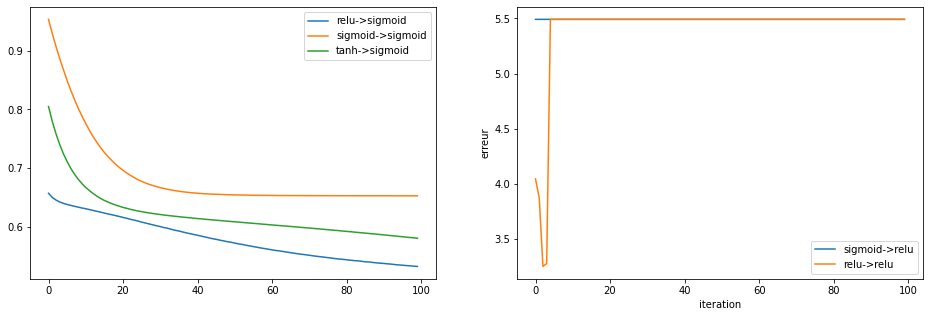

In [12]:
alpha=0.01
NBR_IT = 100

M, N = X_train.shape

L1 = 2
L2 = 2

m1 = Sequential()
m1.add(Dense(L1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m1.add(Dense(L2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m1.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))
print("entrainement ...")
results_m1 = m1.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)

m2 = Sequential()
m2.add(Dense(L1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m2.add(Dense(L2, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m2.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))
print("entrainement ...")
results_m2 = m2.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)

m3 = Sequential()
m3.add(Dense(L1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m3.add(Dense(L2, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m3.add(Dense(1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m3.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))
print("entrainement ...")
results_m3 = m3.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)

m4 = Sequential()
m4.add(Dense(L1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m4.add(Dense(L2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m4.add(Dense(1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m4.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))
print("entrainement ...")
results_m4 = m4.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)

m5 = Sequential()
m5.add(Dense(L1, activation="tanh", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m5.add(Dense(L2, activation="tanh", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m5.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m5.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))
print("entrainement ...")
results_m5 = m5.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

ax1.plot(range(NBR_IT), results_m1.history["loss"], label="relu->sigmoid")
ax1.plot(range(NBR_IT), results_m2.history["loss"], label="sigmoid->sigmoid")
ax1.plot(range(NBR_IT), results_m5.history["loss"], label="tanh->sigmoid")
ax1.legend()
ax2.plot(range(NBR_IT), results_m3.history["loss"], label="sigmoid->relu")
ax2.plot(range(NBR_IT), results_m4.history["loss"], label="relu->relu")
plt.xlabel("iteration")
plt.ylabel("erreur")
plt.legend()
plt.show()

**Analyser les résultats**
- On remarque que le modèle **sigmoid->sigmoid** a stagné rapidement. Expliquer comment ?
- On remarque que le modèle converge plus rappidement (en terme de nombre des itérations) par rapport aux deux modèles avec sortie **sigmoid**. Pourquoi ?
- On remarque que les modèles avec **relu** ne sont pas stables ; à chaque exécution, on aura un diagramme différent (des fois amélioration, des fois détérioration, etc.). Il faut noter que l'initialisation aléatoire n'est pas la source du problème vu qu'il y a d'autres modèles similaires mais stables. Donc, pourquoi nous avons eu ce comportement ?

**Réponse**
- ...
- ...
- ...

#### II.3. Fonctions d'optimisation

Ici, on veut tester les différentes fonctions d'optimisation.
Pour ce faire, on a entrainé 4 modèles et récupéré l'erreur d'entrainement dans chaque itération. 
Les modèles testé sont :
- **GD** : un réseau entrainé avec la descente des gradients
- **Adagrad** : un réseau entrainé avec AdaGrad
- **RMSprop** : un réseau entrainé avec RMSprop
- **Adam** : un réseau entrainé avec Adam

entrainement ...
entrainement ...
entrainement ...
entrainement ...


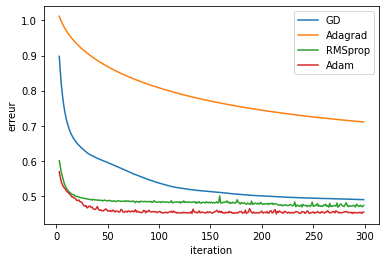

In [13]:
alpha=0.01
NBR_IT = 300

M, N = X_train.shape

L1 = 2
L2 = 2

# Modèle avec Descente du gradient
model_sgd = Sequential()
model_sgd.add(Dense(L1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_sgd.add(Dense(L2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_sgd.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_sgd.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))
print("entrainement ...")
results_sgd = model_sgd.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)

# Modèle avec Adaptative gradient 
model_adagrad = Sequential()
model_adagrad.add(Dense(L1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_adagrad.add(Dense(L2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_adagrad.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_adagrad.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=alpha))
print("entrainement ...")
results_adagrad = model_adagrad.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)


# Modèle avec RMSprop
model_rmsprop = Sequential()
model_rmsprop.add(Dense(L1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_rmsprop.add(Dense(L2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_rmsprop.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_rmsprop.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=alpha))
print("entrainement ...")
results_rmsprop = model_rmsprop.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)


# Modèle avec Adam
model_adam = Sequential()
model_adam.add(Dense(L1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_adam.add(Dense(L2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_adam.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model_adam.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=alpha))
print("entrainement ...")
results_adam = model_adam.fit(X_trains, Y_train, validation_data=(X_tests, Y_test), epochs=NBR_IT, verbose=0)

# on n'affiche pas les 3 premières itérations, le temps que le modèle se stabilise
# sinon, un modèle peut avoir une grande valeur par rapport aux autres 
# donc, on ne peut pas visualiser la convergence des autres
IT_range = range(NBR_IT)[3:]

plt.plot(IT_range, results_sgd.history["loss"][3:], label="GD")
plt.plot(IT_range, results_adagrad.history["loss"][3:], label="Adagrad")
plt.plot(IT_range, results_rmsprop.history["loss"][3:], label="RMSprop")
plt.plot(IT_range, results_adam.history["loss"][3:], label="Adam")
plt.xlabel("iteration")
plt.ylabel("erreur")
plt.legend()
plt.show()

**Analyser les résultats**
- On remarque que le modèle **GD** converge plus vite que **AdaGrad**. Pourquoi ?
- Pourquoi **RMSprop** converge plus rapidement que **AdaGrad**, pourtant leurs equations sont presque similaire ? (ici, vous devez expliquer l'apport dans l'equation du premier par rapport au deuxième)
- Lorsqu'on exécute plusieurs fois, on remarque que Adam est plus stable. Pourquoi ?

**Réponse**
- ...
- ... 
- ...